##  Movies Dataset from Pirated Sites 数据集

In [112]:
import numpy as np 
import pandas as pd #调用numpy和pandas库 读取数据
import matplotlib.pyplot as plt
import seaborn as sns
# Load data set.
movie_data = pd.read_csv('/Users/lansemenghuan/data mining homework/movies_dataset-数据集2.csv')

# Check the columns.
movie_data.columns

Index(['Unnamed: 0', 'IMDb-rating', 'appropriate_for', 'director', 'downloads',
       'id', 'industry', 'language', 'posted_date', 'release_date', 'run_time',
       'storyline', 'title', 'views', 'writer'],
      dtype='object')

## 数据标数属性 和 数值属性

In [113]:
movie_data = movie_data.drop(columns = 'Unnamed: 0')

appropriate_for，director，industry，language，posted_date，release_date，storyline，title，writer为数据标数属性。
IMDb-rating，downloads，id，run_time，views为数值属性。

In [114]:
 #去掉无意义的计数列
def data_type(mov_data): # 统计缺失值的数量和数据的type
    cols, dtype, specimens, num_unique, null_share = [], [], [], [], []

    for column in mov_data:
        cols.append(column)
        col_dtype = mov_data[column].dtype
        dtype.append(col_dtype)
        
        specimen = mov_data.loc[mov_data[column].first_valid_index(), column] # 获取示例
        specimens.append(specimen)
        num_unique.append(mov_data[column].nunique()) # 统计单独的数据
        
        null_sum = mov_data[column].isna().sum()
        null_to_len = null_sum / len(mov_data[column])
        null_share.append(f'{null_to_len:.2%}')
        
    df = pd.DataFrame(list(zip(dtype, specimens, num_unique, null_share)), index=cols)    
    df.columns=['dtype', 'eg.','num_unique',  'null_share']
 
    return df

data_type(movie_data)

,dtype,eg.,num_unique,null_share
IMDb-rating,float64,4.8,85,4.09%
appropriate_for,object,R,21,46.12%
director,object,John Swab,9672,9.43%
downloads,object,304,10625,0.00%
id,int64,372092,17086,0.00%
industry,object,Hollywood / English,10,0.00%
language,object,English,1168,2.64%
posted_date,object,"20 Feb, 2023",4123,0.00%
release_date,object,Jan 28 2023,4886,0.00%
run_time,object,105,415,8.60%


In [115]:
for col in 'downloads', 'views': # 将downloads和views属性替换为float，否则无法进行数值相关性计算
    movie_data[col] = movie_data[col].str.replace(',','')
    movie_data[col] = movie_data[col].astype('float')

movie_data['id'] = movie_data['id'].astype('str')
data_type(movie_data)

,dtype,eg.,num_unique,null_share
IMDb-rating,float64,4.8,85,4.09%
appropriate_for,object,R,21,46.12%
director,object,John Swab,9672,9.43%
downloads,float64,304.0,10625,0.00%
id,object,372092,17086,0.00%
industry,object,Hollywood / English,10,0.00%
language,object,English,1168,2.64%
posted_date,object,"20 Feb, 2023",4123,0.00%
release_date,object,Jan 28 2023,4886,0.00%
run_time,object,105,415,8.60%


In [116]:
Ir_c = movie_data['IMDb-rating'].value_counts() # 数值属性
Ir_d = movie_data['IMDb-rating'].describe()
Ir_c, Ir_d

(6.6    829
 5.0    774
 5.7    747
 6.1    724
 5.5    707
       ... 
 1.1      2
 9.9      1
 9.5      1
 9.1      1
 1.3      1
 Name: IMDb-rating, Length: 85, dtype: int64,
 count    19707.000000
 mean         5.762151
 std          1.374041
 min          1.100000
 25%          4.800000
 50%          5.700000
 75%          6.600000
 max          9.900000
 Name: IMDb-rating, dtype: float64)

In [117]:
af_c = movie_data['appropriate_for'].value_counts()# 标数属性
af_c

R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
18+                  1
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
Name: appropriate_for, dtype: int64

In [118]:
dir_c = movie_data['director'].value_counts() # 标数属性
dir_c

Venky Atluri        405
Xavier Manrique     403
Simone Stock        403
Neil Jordan         205
John Swab           205
                   ... 
Aditya Kripalani      1
Cheryl Nichols        1
Dave Parker           1
Munish Bhardwaj       1
Rajan Khosa           1
Name: director, Length: 9672, dtype: int64

In [119]:
dow_c = movie_data['downloads'].value_counts() # 标数属性
dow_c

75.0       403
622.0      212
378.0      209
1782.0     187
466.0      170
          ... 
43344.0      1
10318.0      1
16697.0      1
3085.0       1
7357.0       1
Name: downloads, Length: 10625, dtype: int64

In [120]:
movie_data['id'].value_counts() # data的id频率

371877    402
371744    402
372090    402
371671    202
371740    202
         ... 
290689      1
362853      1
342632      1
112005      1
322960      1
Name: id, Length: 17086, dtype: int64

In [121]:
movie_data['industry'].value_counts()

Hollywood / English    14649
Bollywood / Indian      2645
Tollywood               1172
Anime / Kids            1049
Wrestling                433
Punjabi                  332
Stage shows              129
Pakistani                 92
Dub / Dual Audio          45
3D Movies                  1
Name: industry, dtype: int64

In [122]:
movie_data['language'].value_counts()

English                                            12657
Hindi                                               2558
English,Spanish                                      391
Punjabi                                              310
English,Hindi                                        304
                                                   ...  
English,Hindi,Tamil                                    1
Dutch,German,English                                   1
English,Norwegian,Spanish,French                       1
English,Middle English,Old English,Latin,German        1
English,Arabic,Swedish,Hindi                           1
Name: language, Length: 1168, dtype: int64

In [123]:
movie_data['posted_date'].value_counts()

13 Feb, 2023    812
20 Feb, 2023    607
15 Feb, 2023    607
10 Feb, 2023    485
16 Feb, 2023    406
               ... 
02 May, 2008      1
26 Nov, 2009      1
17 Aug, 2009      1
08 Aug, 2008      1
24 Aug, 2007      1
Name: posted_date, Length: 4123, dtype: int64

In [124]:
movie_data['release_date'].value_counts()

Jan 01 1970    962
Feb 03 2023    616
Feb 17 2023    607
Feb 10 2023    410
Feb 11 2023    402
              ... 
Jan 09 1998      1
Jun 29 2022      1
Dec 21 2008      1
Jul 27 2007      1
Jan 18 2016      1
Name: release_date, Length: 4886, dtype: int64

In [125]:
rt_c = movie_data['run_time'].value_counts()
rt_c

93         652
88         622
101        568
95         454
139        454
          ... 
147 min      1
135 min      1
10 min       1
159 min      1
28           1
Name: run_time, Length: 415, dtype: int64

In [126]:
movie_data['storyline'].value_counts()

It follows Kara Robinson as she survives an abduction and ultimately brings down a serial killer.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           402
Follows\r\n a New York City family hiding out in the Hamptons whose bubble is \r\npopped when a Bloody Mary-swilling, pot-smoking 'Charlie' comes to bring\r\n a lifetime of hurt that might heal them all.                                                                                                             

In [127]:
movie_data['title'].value_counts()

Who Invited Charlie?                             402
Vaathi                                           402
The Girl Who Escaped: The Kara Robinson Story    402
The Inspection                                   202
Little Dixie                                     202
                                                ... 
The Bigfoot Project                                1
Late Night                                         1
Fear Street: Part Three - 1666                     1
Magic Mike's Last Dance                            1
Think Like a Man Too                               1
Name: title, Length: 16572, dtype: int64

In [128]:
v_c = movie_data['views'].value_counts()
v_c

6259.0     6
5869.0     5
5859.0     5
5603.0     5
4288.0     5
          ..
9366.0     1
18287.0    1
22099.0    1
36583.0    1
7803.0     1
Name: views, Length: 16821, dtype: int64

In [129]:
movie_data['writer'].value_counts()

Nicholas Schutt                            403
Haley Harris                               402
Venky Atluri                               402
John Swab                                  205
Bess Wohl                                  202
                                          ... 
Henry Gilroy                                 1
Dreya Weber                                  1
Travis Beacham, Phil Hay, Matt Manfredi      1
Simon Block                                  1
Will Klipstine, Amy Mills                    1
Name: writer, Length: 13603, dtype: int64

## 数据可视化

In [130]:
appropriate_count = pd.DataFrame(movie_data['appropriate_for'].value_counts()).rename(columns={'appropriate_for': 'appropriate_count'}).sort_values(by='appropriate_count', ascending=True)


In [131]:
movie_data['appropriate_for'] = movie_data['appropriate_for'].replace('Unrated', 'Not Rated')# 将全部的Unrated 替换成Not Rated

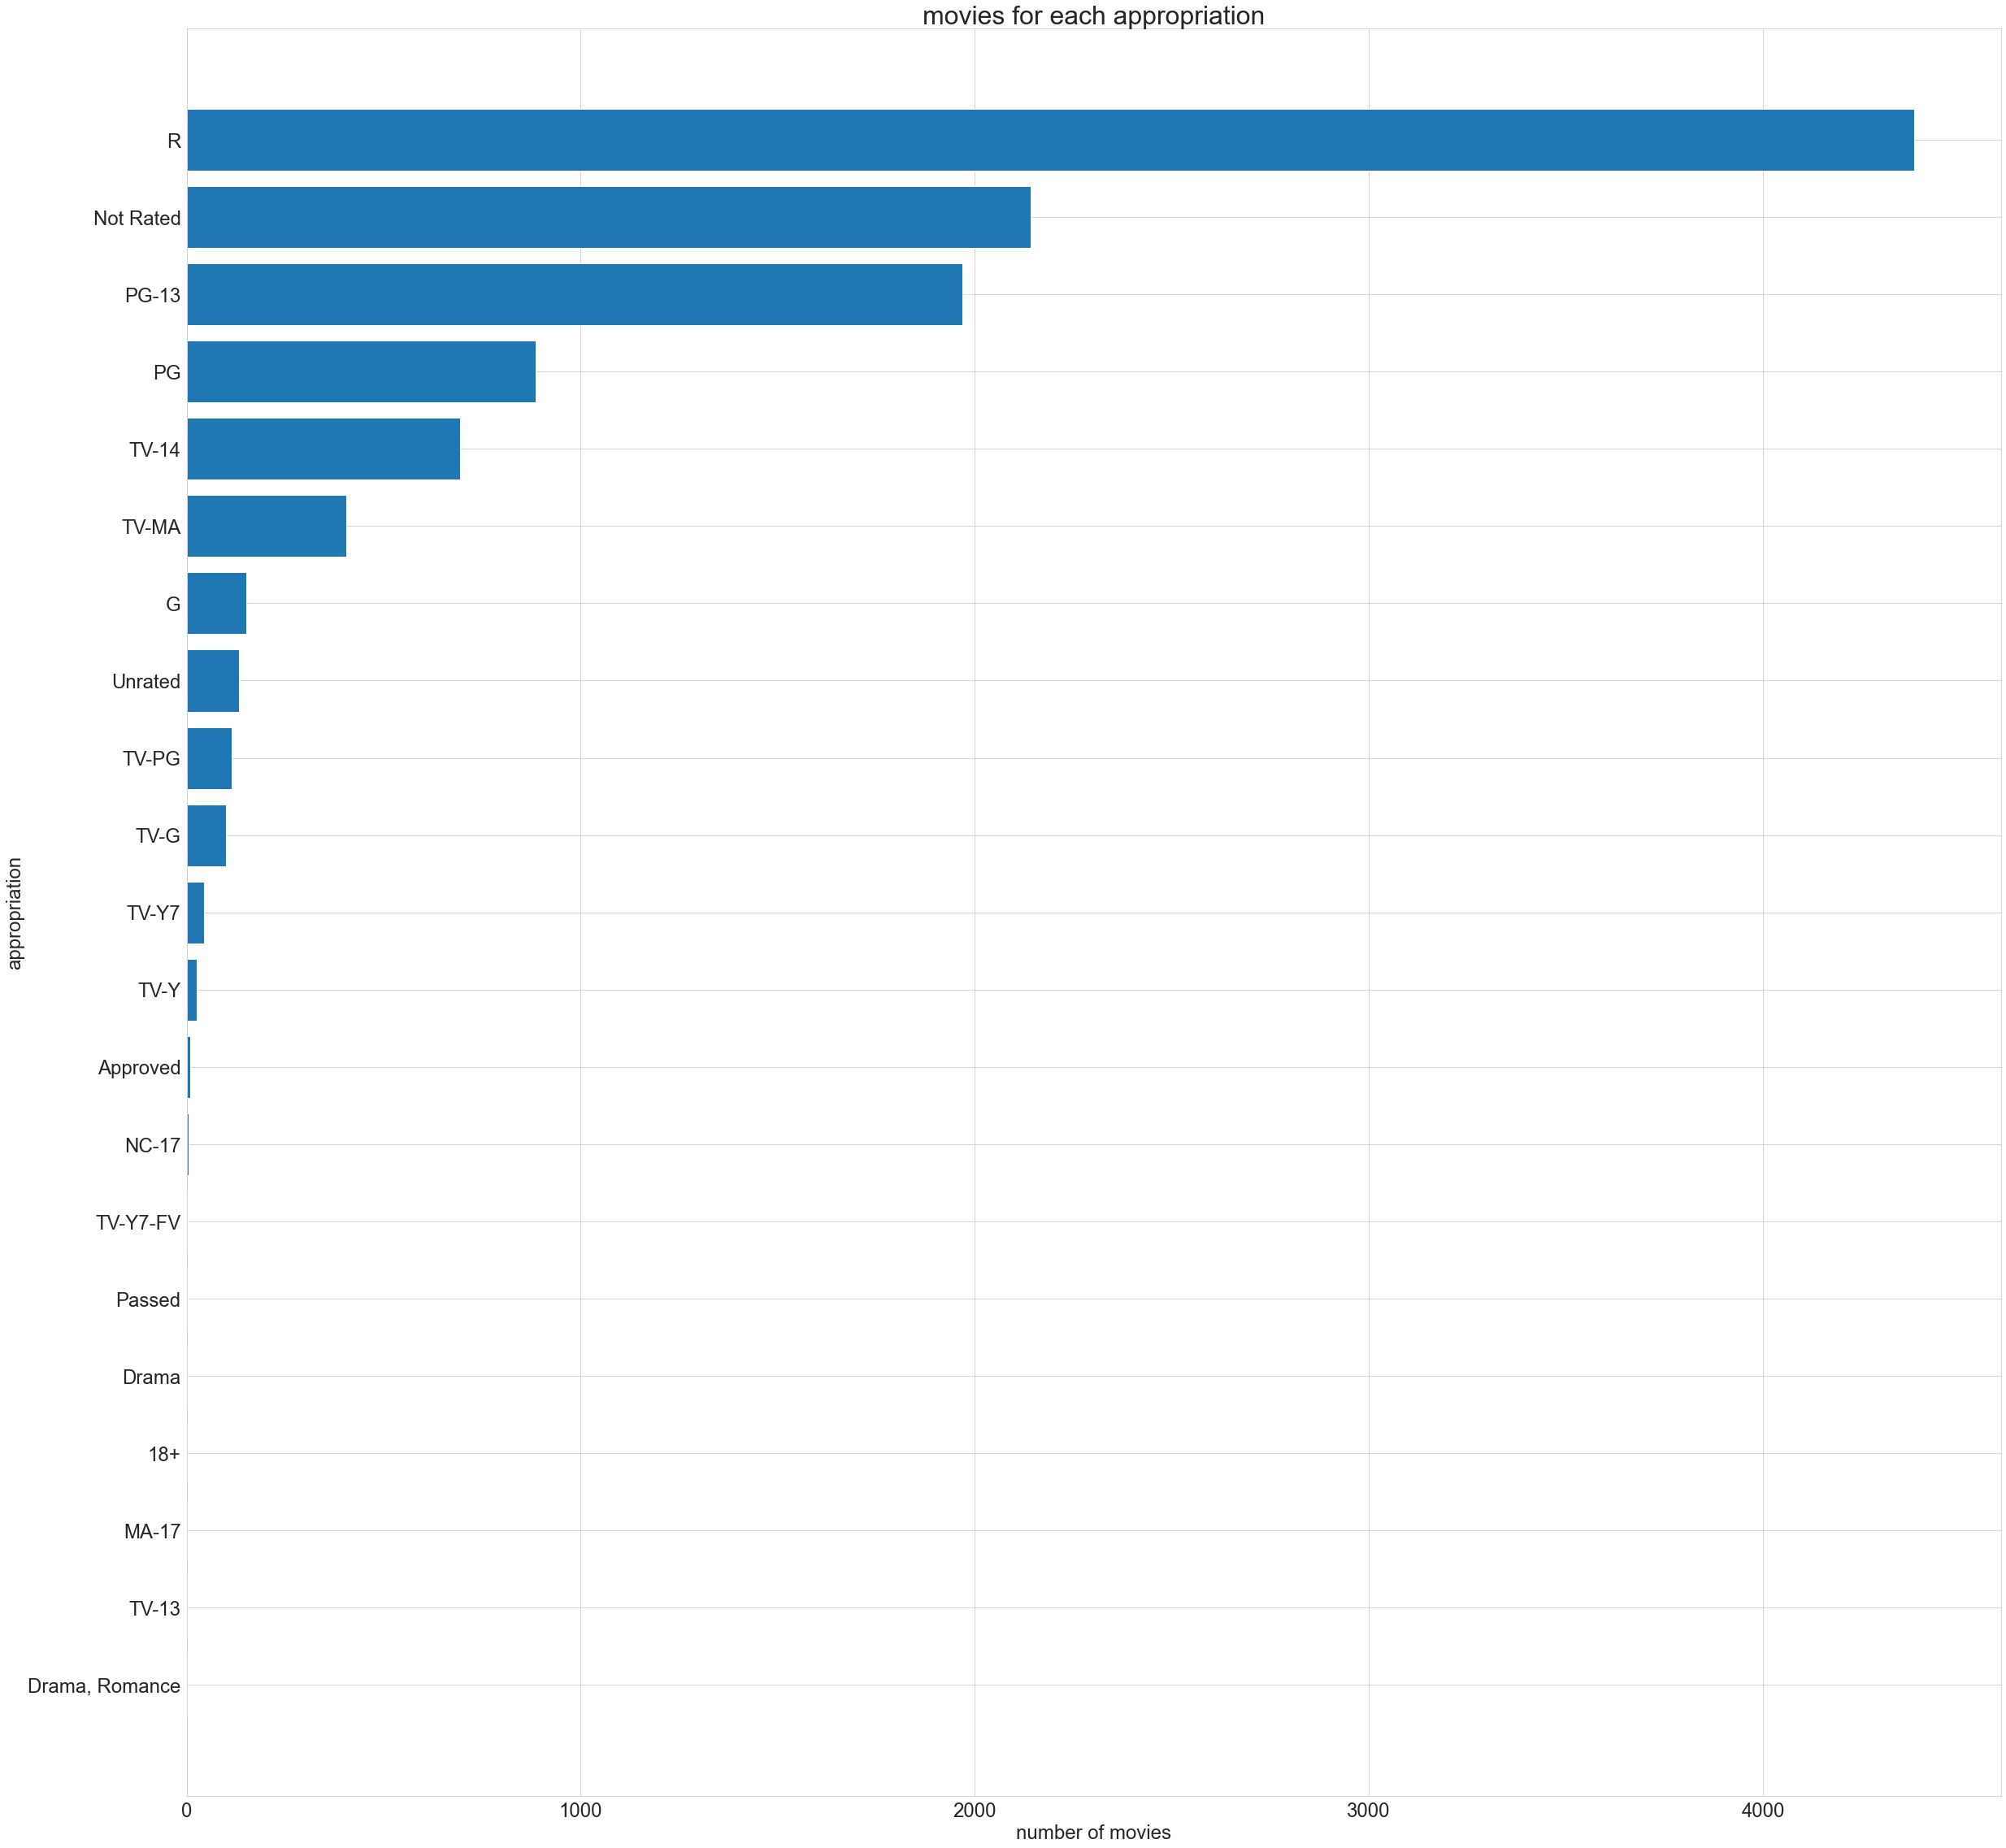

In [132]:
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(appropriate_count.index, width=appropriate_count['appropriate_count'])
plt.ylabel('appropriation', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('movies for each appropriation', fontsize=32, loc='center')
plt.show()

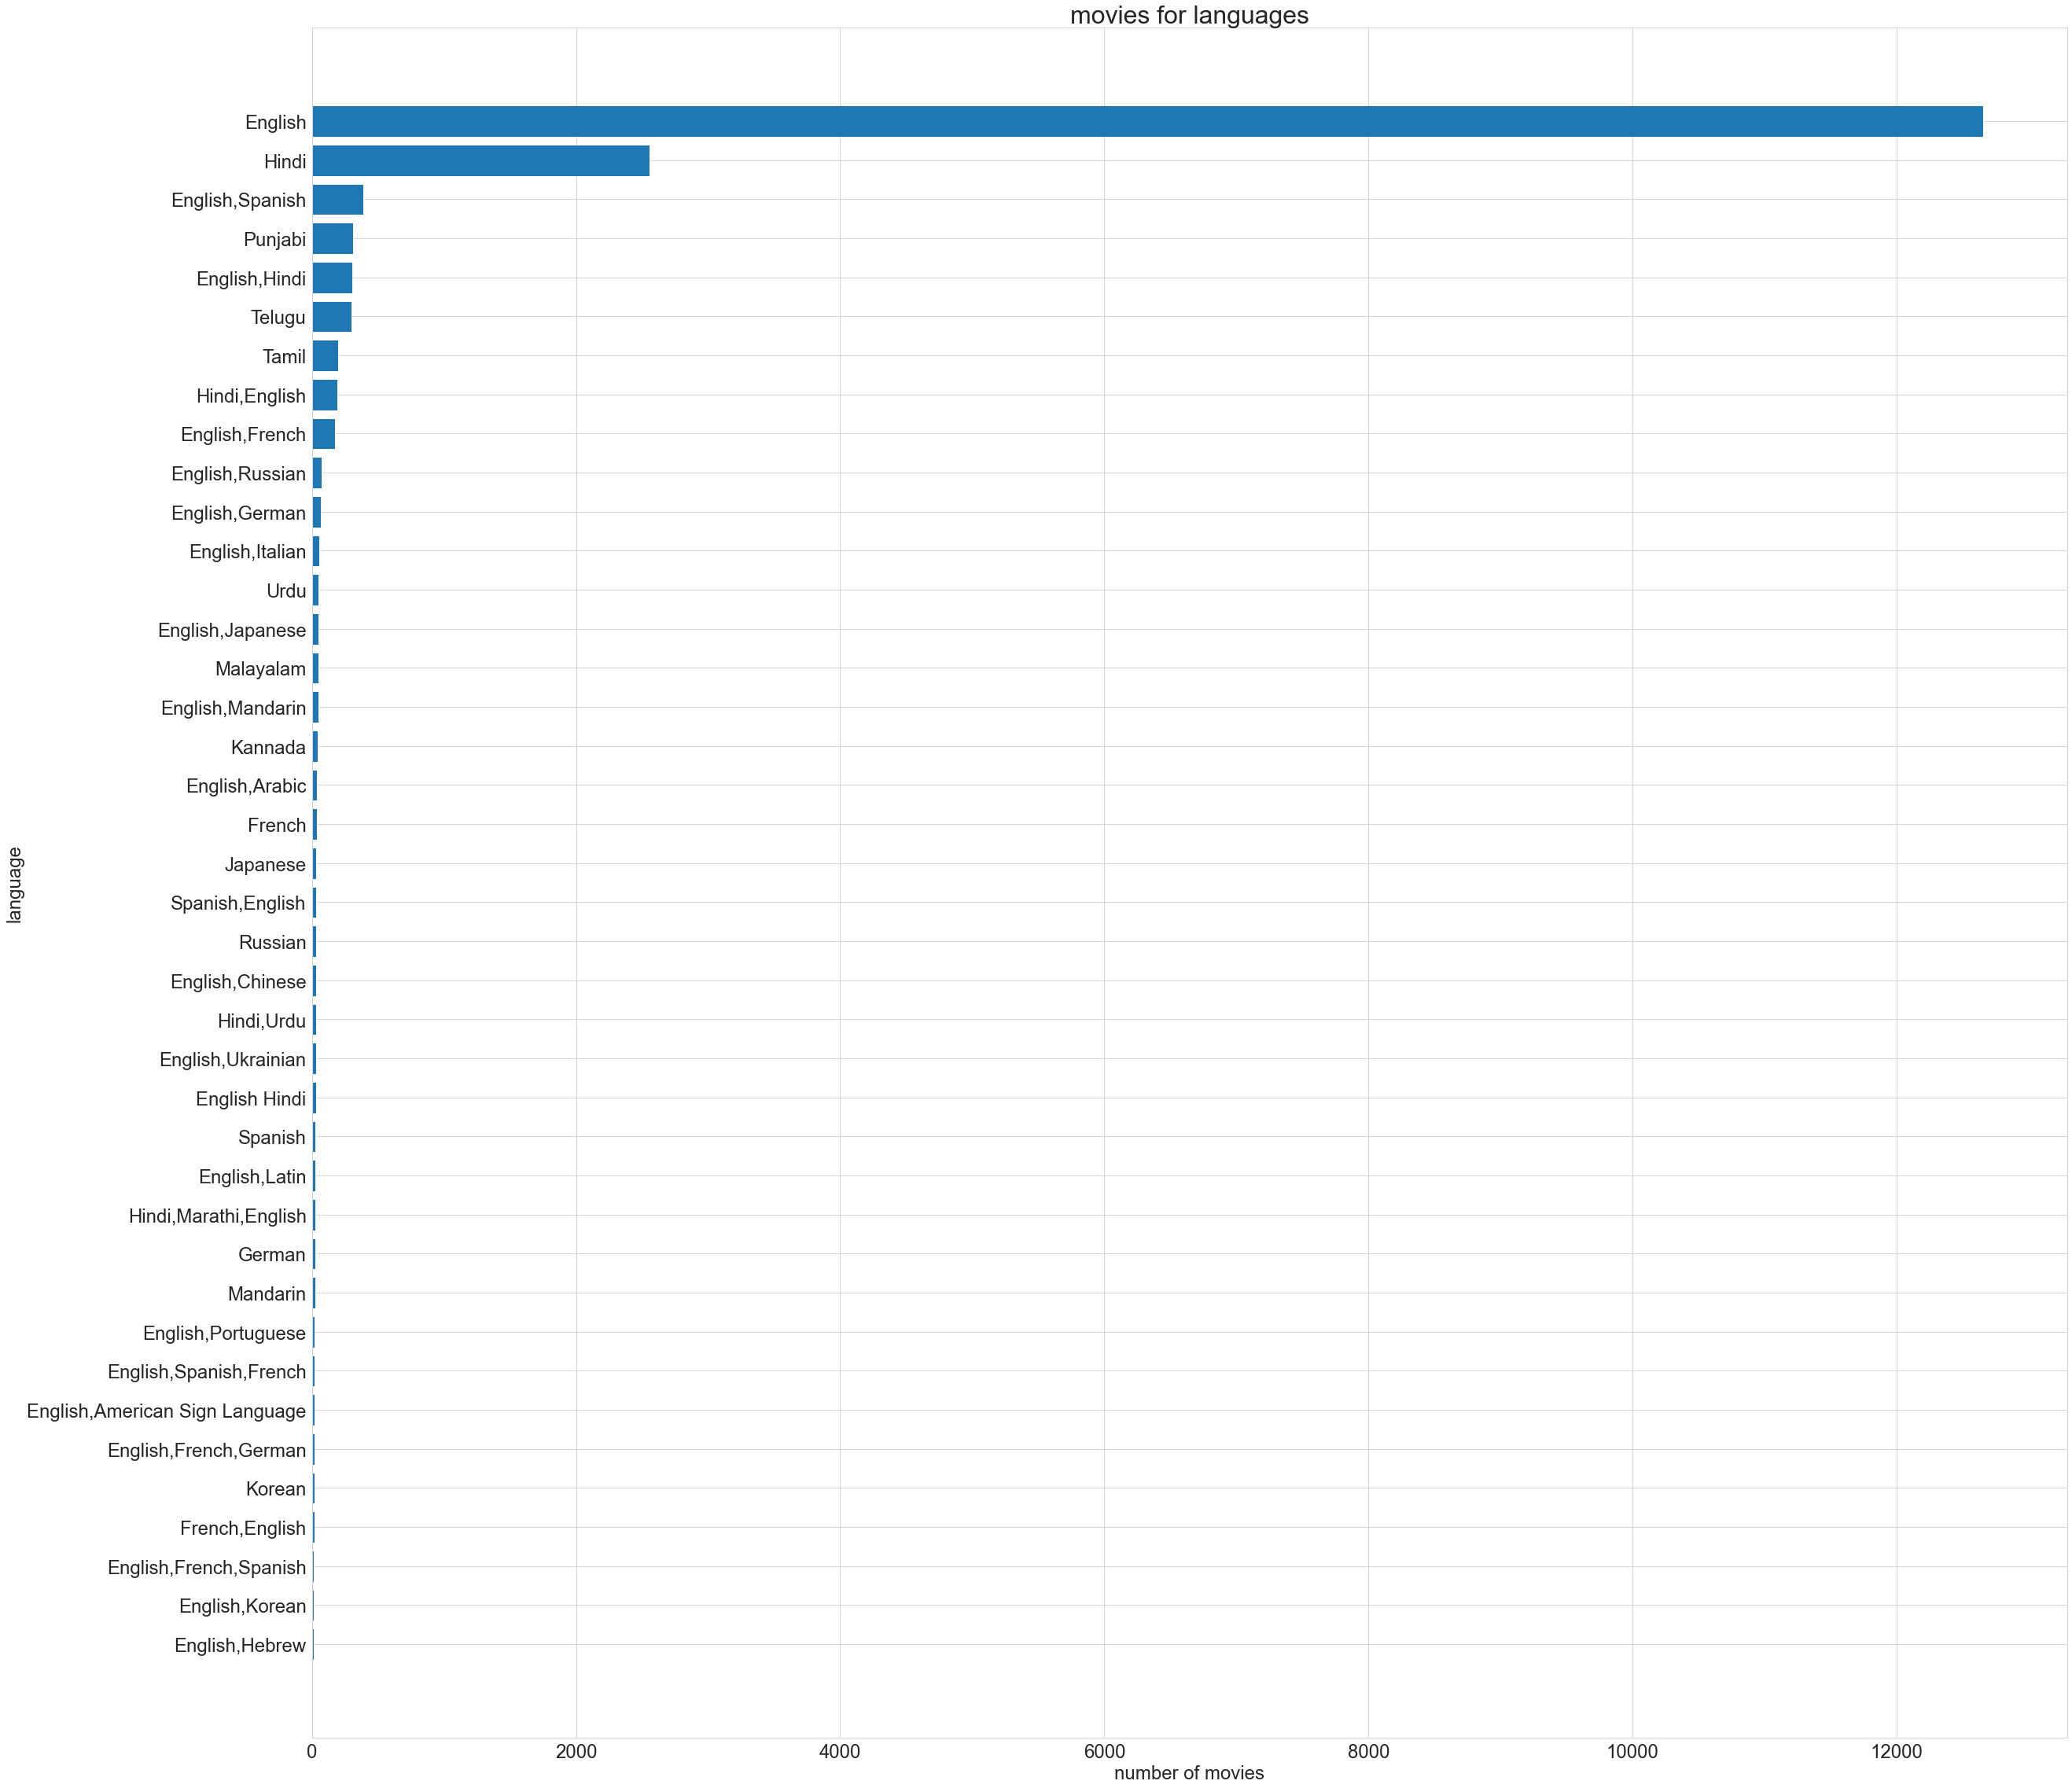

In [133]:
language_count = pd.DataFrame(movie_data['language'].value_counts()).rename(columns={'language': 'language_count'}).sort_values(by='language_count', ascending=True)
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(language_count.index[-40:], width=language_count['language_count'][-40:]) # 输出前40个的language
plt.ylabel('language', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('movies for languages', fontsize=32, loc='center')
plt.show()

利用盒图或者直方图进行数据可视化。

In [134]:
operation_counts = pd.DataFrame(list(movie_data['views']), columns=['counts'])
operation_counts = pd.DataFrame(operation_counts, columns=['operation', 'counts'])
operation_counts['operation'] = 'view'
operation_counts

,operation,counts
0,view,2794.0
1,view,1002.0
2,view,14419.0
3,view,4878.0
4,view,2438.0
...,...,...
20543,view,6219.0
20544,view,16376.0
20545,view,7220.0
20546,view,1419.0


In [135]:
operation_counts = operation_counts.append(pd.DataFrame([['download', c] for c in list(movie_data['downloads'])], columns=['operation', 'counts']), ignore_index=True)
operation_counts

,operation,counts
0,view,2794.0
1,view,1002.0
2,view,14419.0
3,view,4878.0
4,view,2438.0
...,...,...
41091,download,1998.0
41092,download,6080.0
41093,download,3276.0
41094,download,309.0


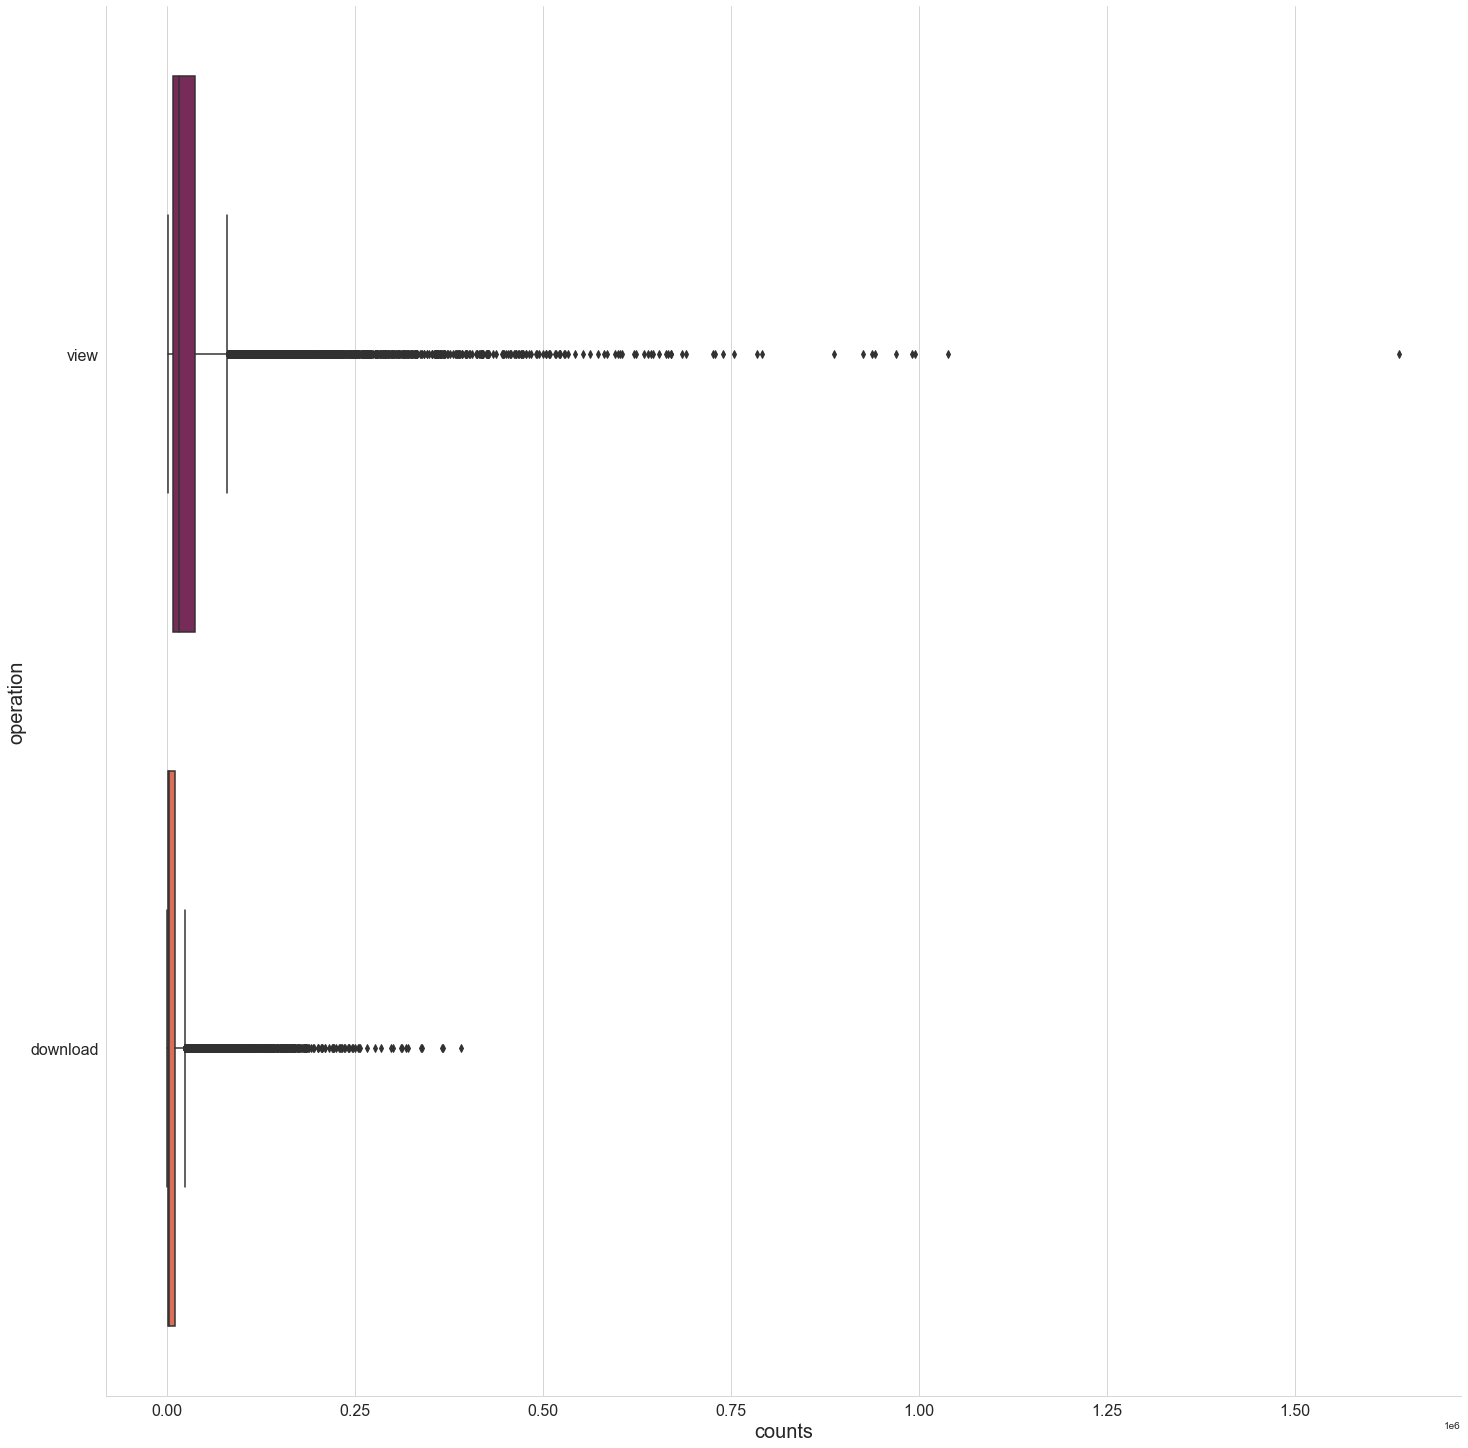

In [136]:
sns.set_style("whitegrid")
operation_counts['counts'] = operation_counts['counts'].astype(float)
operations_count_box = sns.catplot(data=operation_counts, kind='box', y='operation', x='counts', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('operation', fontsize=20)
plt.xlabel('counts', fontsize=20)
plt.show()

## 数据缺失的处理

对于缺失数据的处理，由于downloads，id，industry，posted_date，release_date，title，views缺失率都为0.00%，所以在对于数据处理时可以略过这几列的数据。而对于其他数据，进行有效填充。
IMDb-rating		4.09%
appropriate_for		46.12%
director		9.43%
language		2.64%
run_time		8.60%
storyline		8.28%


In [137]:
from numpy import nan as NA
movie_data.isnull()

,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,True,True,True,False,False,False,False,False,False,True,True,False,False,True
20544,False,True,False,False,False,False,False,False,False,False,False,False,False,False
20545,False,True,True,False,False,False,False,False,False,False,False,False,False,True
20546,True,True,True,False,False,False,False,False,False,True,True,False,False,True


* 将缺失部分剔除

In [139]:
movie_data1 = movie_data.dropna()
movie_data1

,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,4.8,R,John Swab,304.0,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,2794.0,John Swab
1,6.4,TV-PG,Paul Ziller,73.0,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002.0,John Christian Plummer
2,5.2,R,Ben Wheatley,1427.0,343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,14419.0,Ben Wheatley
7,6.5,R,Benjamin Caron,1781.0,371751,Hollywood / English,English,"13 Feb, 2023",Feb 17 2023,116,"Motivations are suspect, and expectations are ...",Sharper,18225.0,"Brian Gatewood, Alessandro Tanaka"
8,6.9,PG-13,Ravi Kapoor,458.0,372042,Hollywood / English,English,"18 Feb, 2023",Dec 02 2022,80,An\r\n unmotivated South Asian American rapper...,Four Samosas,6912.0,Ravi Kapoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20522,7.1,Not Rated,Biren Nag,1932.0,23825,Bollywood / Indian,Hindi,"01 Jan, 1970",May 11 1962,158,"After a lusty Thakur rapes a young girl, she k...",Bees Saal Baad,6076.0,"Dhruva Chatterjee, Dev Kishan"
20525,7.0,G,Guy Hamilton,2544.0,25548,Hollywood / English,"English,German,Polish,French","01 Jan, 1970",Sep 17 1969,132,Historical reenactment of the air war in the e...,Battle of Britain,9319.0,"James Kennaway, Wilfred Greatorex, Derek Dempster"
20533,5.6,R,Barbara Topsøe-Rothenborg,12284.0,1173,Hollywood / English,"Spanish,German,English","26 May, 2016",Jan 01 1970,90,"LOVE AT FIRST HICCUP is a charming, innocent, ...",Love at First Hiccup,36022.0,"Barbara Topsøe-Rothenborg, Søren Frellesen, De..."
20537,7.1,Not Rated,Biren Nag,1932.0,23825,Bollywood / Indian,Hindi,"01 Jan, 1970",May 11 1962,158,"After a lusty Thakur rapes a young girl, she k...",Bees Saal Baad,6077.0,"Dhruva Chatterjee, Dev Kishan"


将缺失部分剔除，可以发现，数据从20548行减少到9902行。

* 用最高频率值来填补缺失值

In [147]:
#填充IMDb-rating
movie_data2 = movie_data

IMDb_rating_counts = pd.DataFrame(Ir_c).sort_values(by='IMDb-rating', ascending=True).rename(columns={'IMDb-rating':'IMDb_rating_count'})
IMDb_rating_HF = IMDb_rating_counts.index[-1]
print(IMDb_rating_HF)
movie_data2 = movie_data.replace(np.nan, IMDb_rating_HF)
movie_data2

6.6


,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,4.8,R,John Swab,304.0,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,2794.0,John Swab
1,6.4,TV-PG,Paul Ziller,73.0,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002.0,John Christian Plummer
2,5.2,R,Ben Wheatley,1427.0,343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,14419.0,Ben Wheatley
3,8.1,6.6,Venky Atluri,1549.0,372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,4878.0,Venky Atluri
4,4.6,6.6,Shaji Kailas,657.0,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,2438.0,Rajesh Jayaraman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,6.6,6.6,6.6,1998.0,28957,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 13 1959,6.6,6.6,Bhai-Bahen,6219.0,6.6
20544,7.7,6.6,Bimal Roy,6080.0,28958,Bollywood / Indian,Hindi,"01 Jan, 1970",May 13 1955,159,Devdas and Parvati had been inseparable as chi...,Devdas,16376.0,"Rajinder Singh Bedi, Saratchandra Chatterjee, ..."
20545,8.0,6.6,6.6,3276.0,30459,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 28 1958,1h 50min,"While driving his car on a rainy night, Anand'...",Madhumati,7220.0,6.6
20546,6.6,6.6,6.6,309.0,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,6.6,6.6,TNA.Impact 2023-02-09,1419.0,6.6


In [148]:
appropriate_for_counts = pd.DataFrame(af_c).sort_values(by='appropriate_for', ascending=True).rename(columns={'appropriate_for':'appropriate_for_count'})
appropriate_for_HF = appropriate_for_counts.index[-1]
print(appropriate_for_HF)
movie_data2 = movie_data.replace(np.nan, appropriate_for_HF)
movie_data2

R


,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,4.8,R,John Swab,304.0,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,2794.0,John Swab
1,6.4,TV-PG,Paul Ziller,73.0,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002.0,John Christian Plummer
2,5.2,R,Ben Wheatley,1427.0,343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,14419.0,Ben Wheatley
3,8.1,R,Venky Atluri,1549.0,372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,4878.0,Venky Atluri
4,4.6,R,Shaji Kailas,657.0,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,2438.0,Rajesh Jayaraman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,R,R,R,1998.0,28957,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 13 1959,R,R,Bhai-Bahen,6219.0,R
20544,7.7,R,Bimal Roy,6080.0,28958,Bollywood / Indian,Hindi,"01 Jan, 1970",May 13 1955,159,Devdas and Parvati had been inseparable as chi...,Devdas,16376.0,"Rajinder Singh Bedi, Saratchandra Chatterjee, ..."
20545,8.0,R,R,3276.0,30459,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 28 1958,1h 50min,"While driving his car on a rainy night, Anand'...",Madhumati,7220.0,R
20546,R,R,R,309.0,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,R,R,TNA.Impact 2023-02-09,1419.0,R


In [149]:
director_counts = pd.DataFrame(dir_c).sort_values(by='director', ascending=True).rename(columns={'director':'director_count'})
director_HF = director_counts.index[-1]
print(director_HF)
movie_data2 = movie_data.replace(np.nan, director_HF)
movie_data2

Venky Atluri


,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,4.8,R,John Swab,304.0,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,2794.0,John Swab
1,6.4,TV-PG,Paul Ziller,73.0,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002.0,John Christian Plummer
2,5.2,R,Ben Wheatley,1427.0,343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,14419.0,Ben Wheatley
3,8.1,Venky Atluri,Venky Atluri,1549.0,372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,4878.0,Venky Atluri
4,4.6,Venky Atluri,Shaji Kailas,657.0,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,2438.0,Rajesh Jayaraman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,Venky Atluri,Venky Atluri,Venky Atluri,1998.0,28957,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 13 1959,Venky Atluri,Venky Atluri,Bhai-Bahen,6219.0,Venky Atluri
20544,7.7,Venky Atluri,Bimal Roy,6080.0,28958,Bollywood / Indian,Hindi,"01 Jan, 1970",May 13 1955,159,Devdas and Parvati had been inseparable as chi...,Devdas,16376.0,"Rajinder Singh Bedi, Saratchandra Chatterjee, ..."
20545,8.0,Venky Atluri,Venky Atluri,3276.0,30459,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 28 1958,1h 50min,"While driving his car on a rainy night, Anand'...",Madhumati,7220.0,Venky Atluri
20546,Venky Atluri,Venky Atluri,Venky Atluri,309.0,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,Venky Atluri,Venky Atluri,TNA.Impact 2023-02-09,1419.0,Venky Atluri


In [151]:
movie_data2.isna().sum()

IMDb-rating        0
appropriate_for    0
director           0
downloads          0
id                 0
industry           0
language           0
posted_date        0
release_date       0
run_time           0
storyline          0
title              0
views              0
writer             0
dtype: int64

* 通过属性的相关关系来填补缺失值

大多数属性都缺少数据,可以看到浏览量和下载量是有较少的NA，考虑与appropriate_for的相关性最高的数据来进填充。在填充编剧和导演时，考虑language。


In [174]:
movie_data3 = movie_data

In [175]:
df1 = movie_data3.groupby('appropriate_for').agg(avg=('IMDb-rating', 'mean'))
df1

,avg
appropriate_for,
18+,8.863850
Approved,7.425500
Drama,5.036828
"Drama, Romance",6.874739
G,6.344421
MA-17,4.254562
NC-17,6.543969
Not Rated,5.558707
PG,5.974179


In [176]:
movie_data3 = movie_data
for i in range(len(movie_data3)):
    if movie_data3['appropriate_for'].iloc[i] is NA:
        rate = movie_data3['IMDb-rating'].iloc[i]
        dist = []
        for j in range(len(df1)):
            dist.append(abs(df1.iloc[j]['avg']-rate))
        idx = dist.index(min(dist))
        movie_data3['appropriate_for'].iloc[i] = df1.index[idx]
movie_data3['appropriate_for'].value_counts()

R                 4579
PG-13             2355
Not Rated         2274
MA-17             2181
18+               1468
TV-MA             1266
Drama             1154
PG                 886
TV-14              880
Passed             523
G                  484
Drama, Romance     479
TV-13              453
Approved           400
TV-PG              316
NC-17              257
TV-Y               231
TV-Y7-FV           218
TV-G                99
TV-Y7               45
Name: appropriate_for, dtype: int64

* 通过数据对象之间的相似性来填补缺失值

In [177]:
movie_data4 = movie_data

In [178]:
def regularit(df):
    new_df = pd.DataFrame(index = df.index)
    columns = ['IMDb-rating','downloads','views']
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        new_df[c] = ((d-MIN) / (d-MAX))
    return new_df
movie_data5 = regularit(movie_data4)



In [179]:
appropriate = pd.concat([movie_data5, movie_data4['appropriate_for']], axis=1)
appropriate

,IMDb-rating,downloads,views,appropriate_for
0,-0.725490,-0.000778,-0.001300,R
1,-1.514286,-0.000187,-0.000205,TV-PG
2,-0.872340,-0.003660,-0.008467,R
3,-3.888889,-0.003975,-0.002578,Passed
4,-0.660377,-0.001682,-0.001082,MA-17
...,...,...,...,...
20543,NaN,-0.005133,-0.003401,18+
20544,-3.000000,-0.015784,-0.009684,Approved
20545,-3.631579,-0.008443,-0.004017,Passed
20546,NaN,-0.000790,-0.000459,18+


In [180]:
infos = []
for i in range(len(appropriate)):
    info = []
    rate = appropriate['IMDb-rating'].iloc[i]
    download = appropriate['downloads'].iloc[i]
    view = appropriate['views'].iloc[i]
    info.append(rate)
    info.append(download)
    info.append(view)
    infos.append(info)

In [181]:
for i in range(len(appropriate)):
    if appropriate['appropriate_for'].iloc[i] is NA:
        dists = []
        for j in len(rates):
            dist = np.sqrt(np.sum(np.square(infos[i] - infos[j])))
            dists.append(dist)
        idx = dists.index(min(dists))
        movie_data4['appropriate_for'].iloc[i] = movie_data4['appropriate_for'].iloc[idx]
movie_data4['appropriate_for'].value_counts()

R                 4579
PG-13             2355
Not Rated         2274
MA-17             2181
18+               1468
TV-MA             1266
Drama             1154
PG                 886
TV-14              880
Passed             523
G                  484
Drama, Romance     479
TV-13              453
Approved           400
TV-PG              316
NC-17              257
TV-Y               231
TV-Y7-FV           218
TV-G                99
TV-Y7               45
Name: appropriate_for, dtype: int64